## Sephora Products and Reviews Data Analysis

## 1. Imports

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data

In [221]:
df_product_info = pd.read_csv("data/product_info.csv")
print(f'Product info shape: {df_product_info.shape}')

Product info shape: (8494, 27)


In [222]:
review_files = [
    'data/reviews_1.csv', 'data/reviews_2.csv', 'data/reviews_3.csv',
    'data/reviews_4.csv', 'data/reviews_5.csv'
]

dfs_reviews = [
    pd.read_csv(file, index_col=0, dtype={'author_id': 'str'})
    for file in review_files
]

df_reviews = pd.concat(dfs_reviews, axis=0)
print(f'Reviews shape: {df_reviews.shape}')

Reviews shape: (1094411, 18)


In [223]:
print(f'Number of users: {df_reviews['author_id'].nunique()}')

Number of users: 503216


## 3. Preprocessing

In [ ]:
missing_percent = df_product_info.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.3].index

df_product_info = df_product_info.drop(columns=cols_to_drop)
print(f"Dropped columns: {list(cols_to_drop)}")

df_product_info.head(5)

Dropped columns: ['variation_desc', 'value_price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price']


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [225]:
missing_percent = df_reviews.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.3].index

df_reviews = df_reviews.drop(columns=cols_to_drop)
print(f"Dropped columns: {list(cols_to_drop)}")

df_reviews['submission_time'] = pd.to_datetime(df_reviews['submission_time'])
df_reviews['year'] = df_reviews['submission_time'].dt.year
df_reviews['month'] = df_reviews['submission_time'].dt.month
df_reviews['day'] = df_reviews['submission_time'].dt.day
df_reviews['weekday'] = df_reviews['submission_time'].dt.day_name()

df_reviews.head(5)

Dropped columns: ['helpfulness']


,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,...,skin_type,hair_color,product_id,product_name,brand_name,price_usd,year,month,day,weekday
0,1741593524,5,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,...,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,Wednesday
1,31423088263,1,0.0,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,...,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,Tuesday
2,5061282401,5,1.0,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,...,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,Tuesday
3,6083038851,5,1.0,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,...,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Monday
4,47056667835,5,1.0,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,...,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Monday


In [276]:
first_review_date = df_reviews['submission_time'].min()
last_review_date = df_reviews['submission_time'].max()

print(f"First review date: {first_review_date}")
print(f"Last review date: {last_review_date}")

First review date: 2008-08-28 00:00:00
Last review date: 2023-03-21 00:00:00


## 4. Product analysis

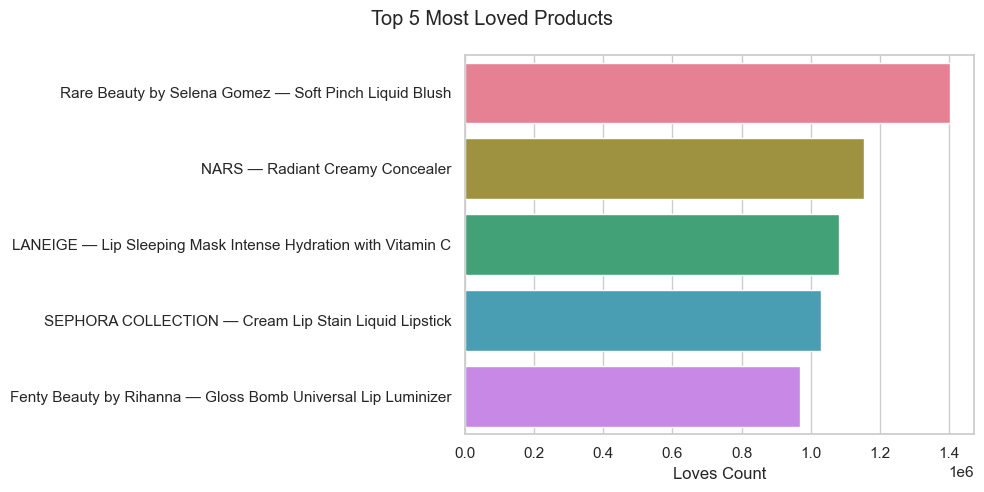

In [390]:
most_recommended = df_product_info.groupby([
    'product_id', 'product_name', 'brand_name'
]).sum(numeric_only=True)['loves_count'].reset_index().sort_values(
    'loves_count', ascending=False).head(5)

most_recommended['brand_product'] = most_recommended[
    'brand_name'] + " — " + most_recommended['product_name']

plt.figure(figsize=(10, 5))

sns.barplot(most_recommended,
            x='loves_count',
            y='brand_product',
            palette='husl', hue='brand_product')

plt.suptitle("Top 5 Most Loved Products")
plt.xlabel("Loves Count")
plt.ylabel("")

plt.tight_layout()
plt.show()

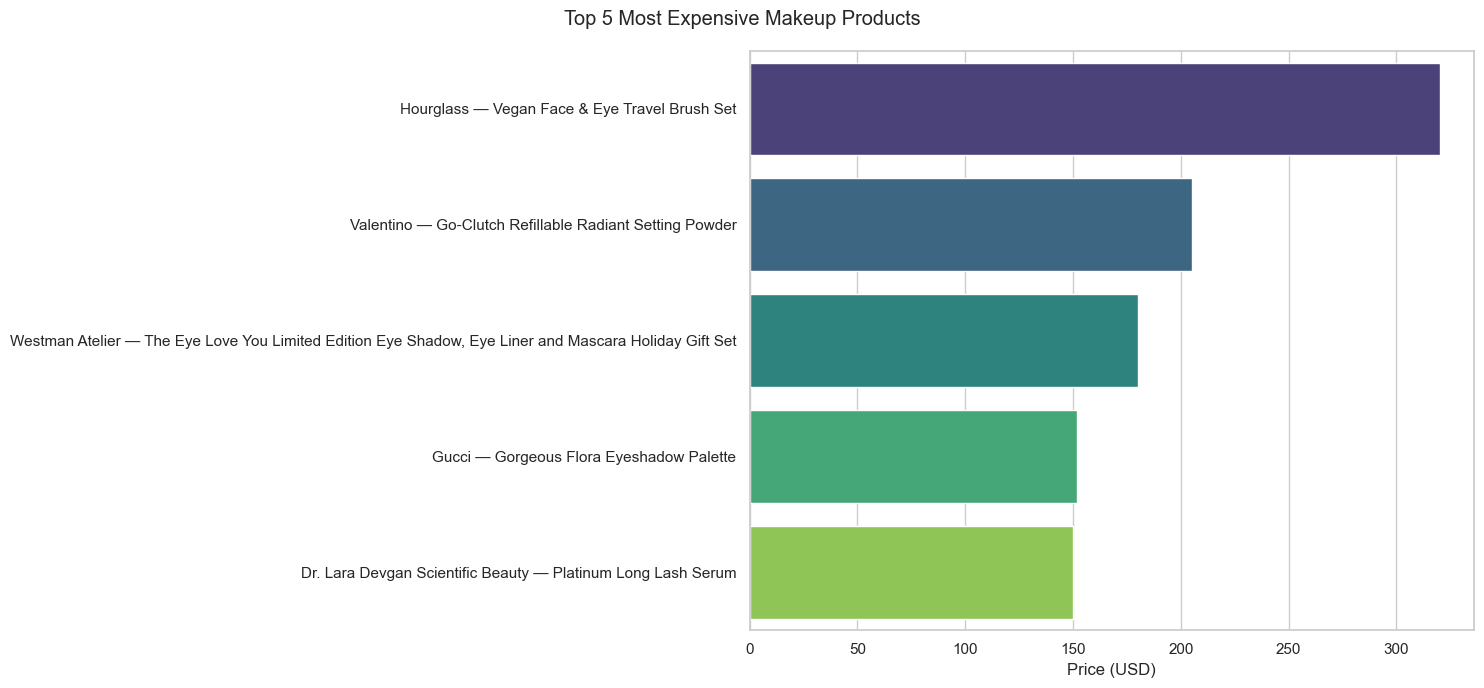

In [389]:
most_expensive = df_product_info[df_product_info['primary_category']=='Makeup'].groupby(['product_id','product_name','price_usd', 'brand_name']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=False).head(5)

most_expensive['brand_product'] = most_expensive[
    'brand_name'] + " — " + most_expensive['product_name']

plt.figure(figsize=(15, 7))

sns.barplot(most_expensive,
            x='price_usd',
            y='brand_product',
            palette='viridis',
            hue='brand_product')

plt.suptitle("Top 5 Most Expensive Makeup Products")
plt.xlabel("Price (USD)")
plt.ylabel("")

plt.tight_layout()
plt.show()

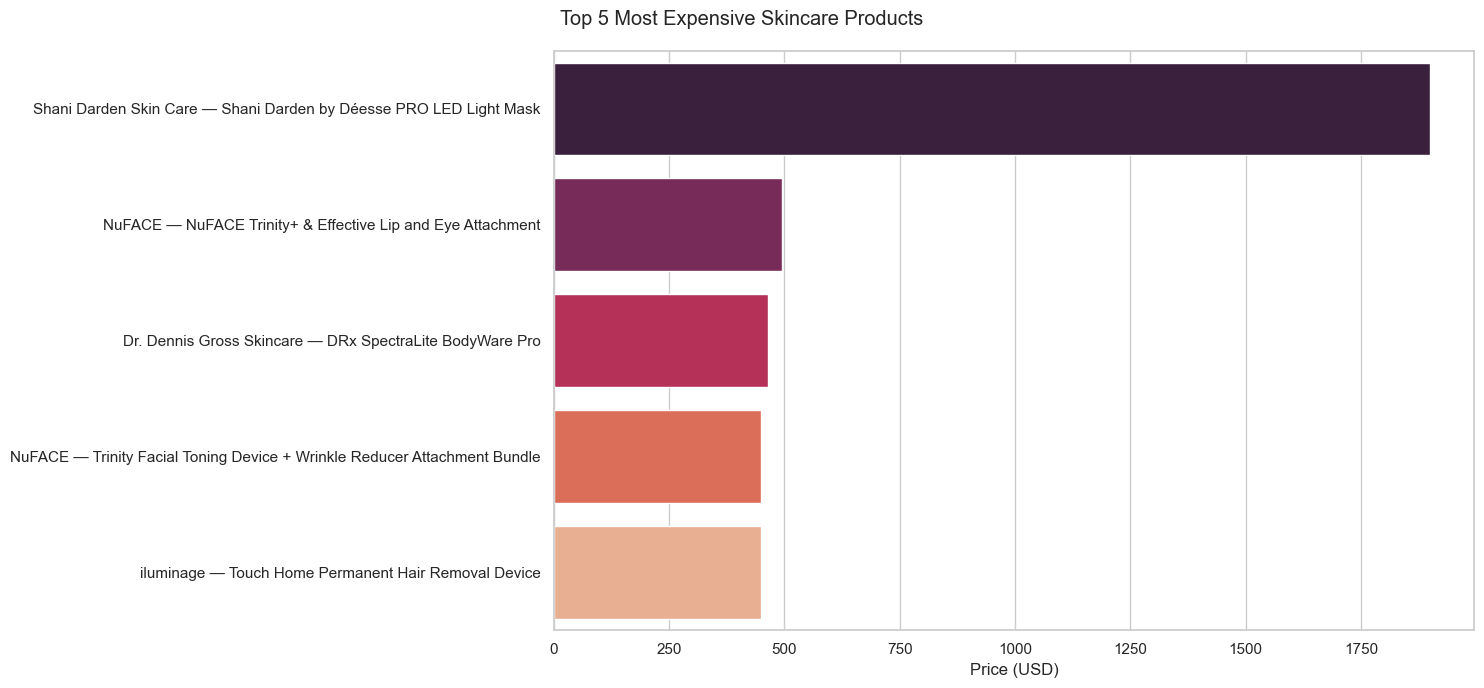

In [392]:
most_expensive = df_product_info[df_product_info['primary_category']=='Skincare'].groupby(['product_id','product_name','price_usd', 'brand_name']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=False).head(5)

most_expensive['brand_product'] = most_expensive[
    'brand_name'] + " — " + most_expensive['product_name']

plt.figure(figsize=(15, 7))

sns.barplot(most_expensive,
            x='price_usd',
            y='brand_product',
            palette='rocket',
            hue='brand_product')

plt.suptitle("Top 5 Most Expensive Skincare Products")
plt.xlabel("Price (USD)")
plt.ylabel("")

plt.tight_layout()
plt.show()

## 5. Brand analysis

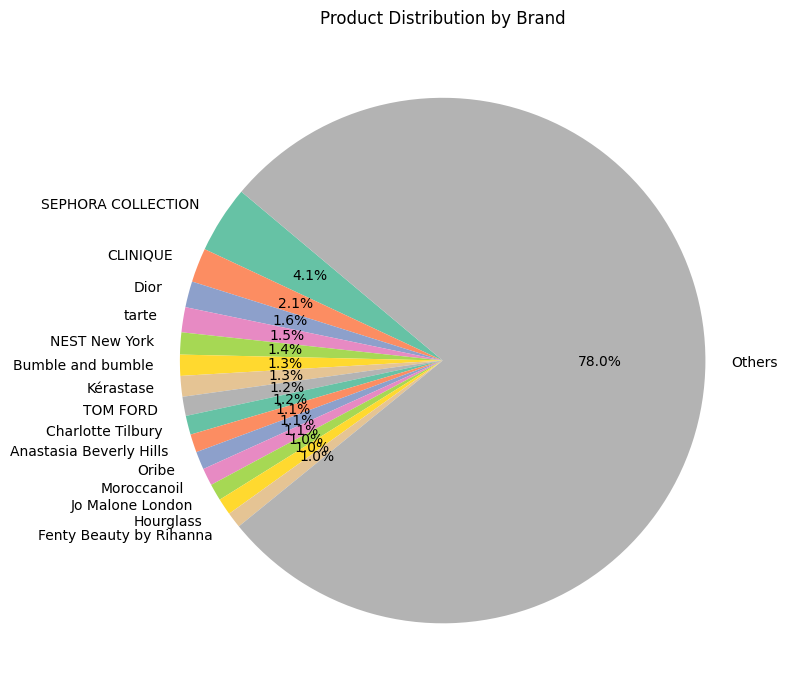

In [270]:
brand_counts = df_product_info['brand_name'].value_counts()

top_brands = brand_counts.head(15)
other_count = brand_counts[15:].sum()
top_brands['Others'] = other_count

plt.figure(figsize=(8, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Product Distribution by Brand')

plt.tight_layout()
plt.show()

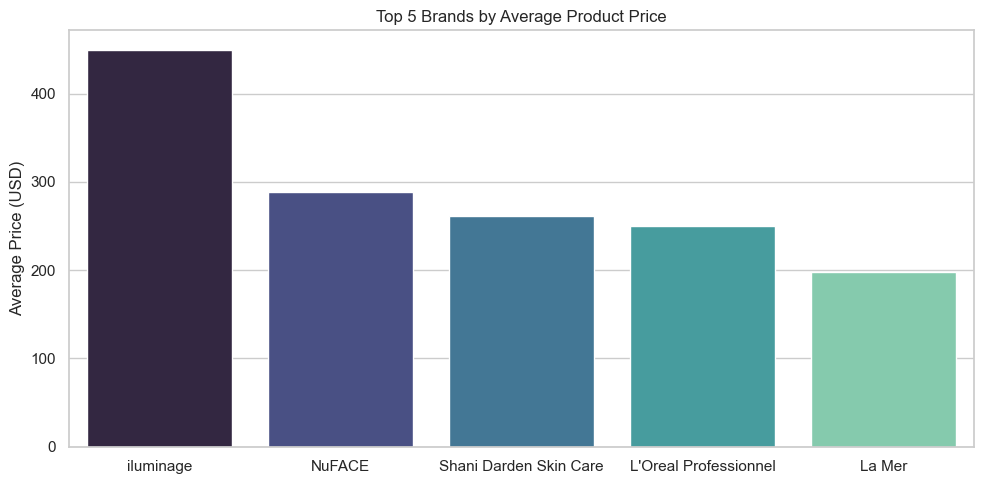

In [407]:
brand_avg_price = (
    df_product_info.groupby('brand_name')['price_usd'].mean().sort_values(
        ascending=False).head(5).reset_index())

plt.figure(figsize=(10, 5))
sns.barplot(data=brand_avg_price,
            x='brand_name',
            y='price_usd',
            palette='mako',
            hue='brand_name')

plt.title('Top 5 Brands by Average Product Price')
plt.xlabel('')
plt.ylabel('Average Price (USD)')

plt.tight_layout()
plt.show()

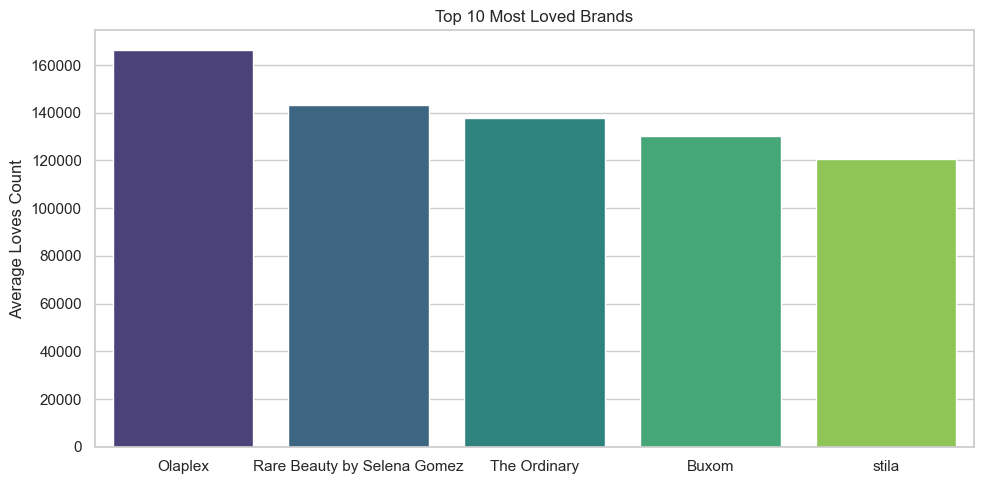

In [ ]:
brand_loves = (df_product_info.groupby('brand_name').agg(
    total_loves=('loves_count', 'sum'),
    product_count=('product_id',
                   'nunique')).assign(avg_loves_per_product=lambda x: x[
                       'total_loves'] / x['product_count']).sort_values(
                           'avg_loves_per_product',
                           ascending=False).head(5).reset_index())

plt.figure(figsize=(10, 5))
sns.barplot(data=brand_loves,
            x='brand_name',
            y='avg_loves_per_product',
            palette='viridis',
            hue='brand_name')

plt.title('Top 5 Most Loved Brands')
plt.xlabel('')
plt.ylabel('Average Loves Count')

plt.tight_layout()
plt.show()

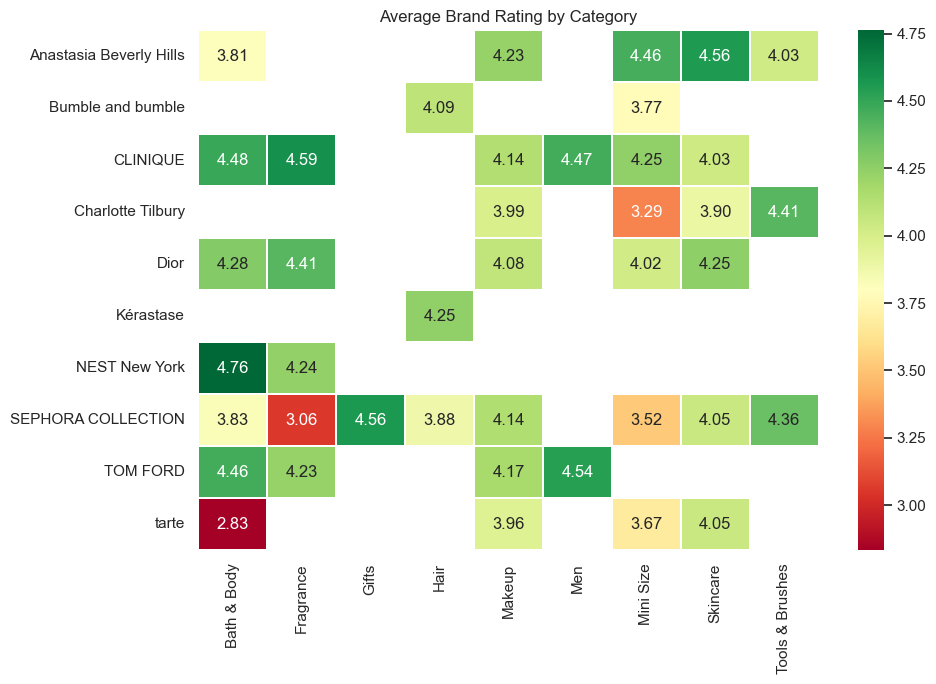

In [380]:
top_brands = (df_product_info['brand_name'].value_counts().head(10).index)
df_top_brands = df_product_info[df_product_info['brand_name'].isin(top_brands)]

brand_cat_rating = (df_top_brands.groupby(['brand_name', 'primary_category'
                                           ])['rating'].mean().reset_index())

heatmap_data = brand_cat_rating.pivot(index='brand_name',
                                      columns='primary_category',
                                      values='rating')

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data,
            annot=True,
            fmt=".2f",
            cmap="RdYlGn",
            linewidths=0.3)

plt.title('Average Brand Rating by Category')
plt.grid(False)
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 6. Category analysis

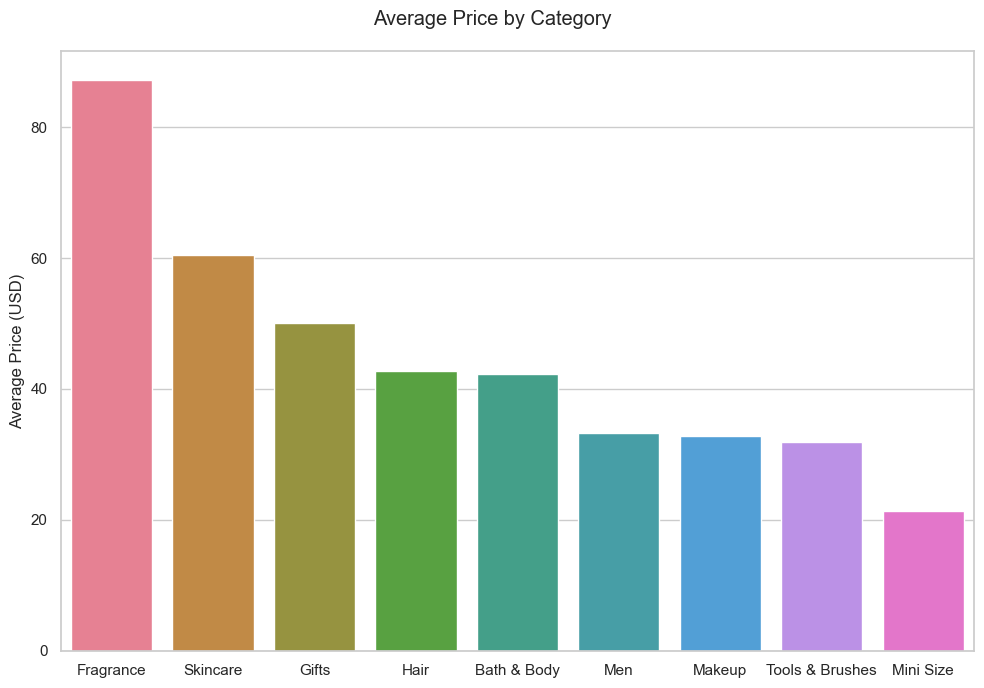

In [394]:
grouped_primary_cat = df_product_info.groupby('primary_category')[['price_usd']].mean().sort_values('price_usd', ascending=False).reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(data=grouped_primary_cat,
            x='primary_category',
            y='price_usd',
            palette='husl',
            hue='primary_category')

plt.suptitle('Average Price by Category')
plt.xlabel('')
plt.ylabel('Average Price (USD)')

plt.tight_layout()
plt.show()

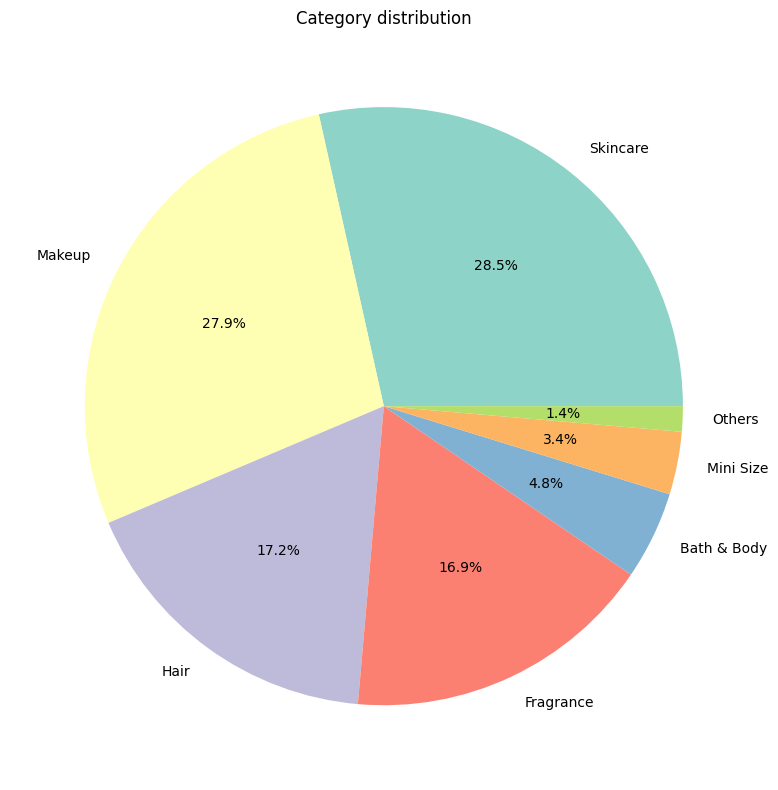

In [312]:
category_counts = df_product_info['primary_category'].value_counts(
    normalize=True)

threshold = 0.03
large_categories = category_counts[category_counts >= threshold]
small_sum = category_counts[category_counts < threshold].sum()

final_counts = large_categories.copy()
final_counts['Others'] = small_sum

plt.figure(figsize=(8, 8))
plt.pie(final_counts,
        labels=final_counts.index,
        autopct='%1.1f%%',
        colors=plt.cm.Set3.colors)

plt.title('Category distribution')

plt.tight_layout()
plt.show()

## 7. Reviews analysis

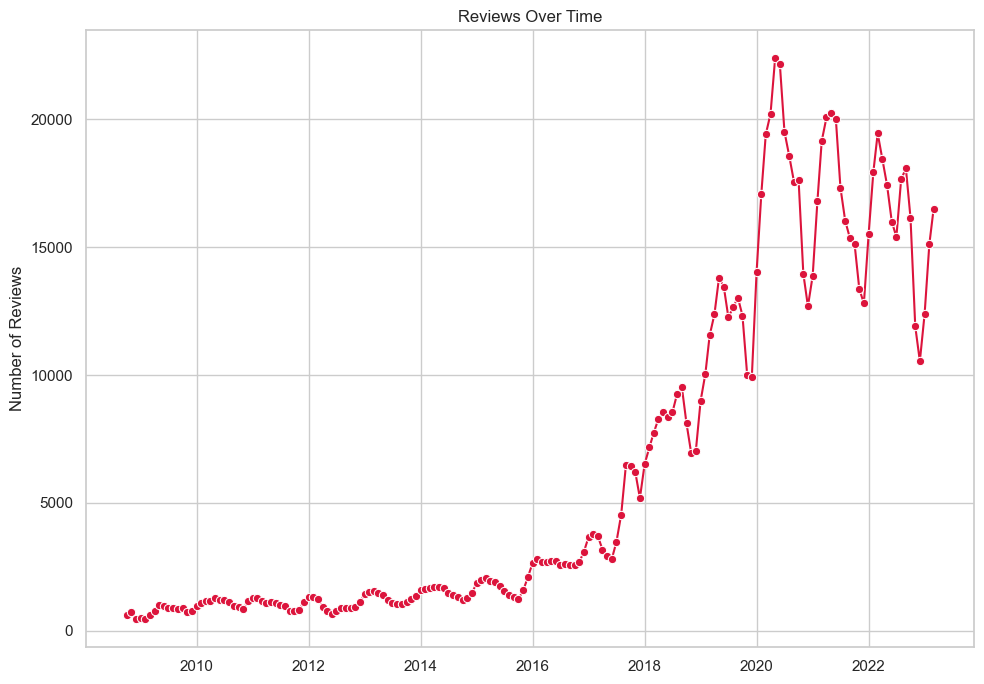

In [395]:
monthly_reviews = df_reviews.resample(
    'ME', on='submission_time')['author_id'].count().reset_index()
monthly_reviews.rename(columns={'author_id': 'review_count'}, inplace=True)

monthly_reviews['review_count_smooth'] = monthly_reviews[
    'review_count'].rolling(window=3, center=True).mean()

plt.figure(figsize=(10, 7))
sns.lineplot(data=monthly_reviews,
             x='submission_time',
             y='review_count_smooth',
             marker='o',
             color='crimson')

plt.title('Reviews Over Time')
plt.xlabel('')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

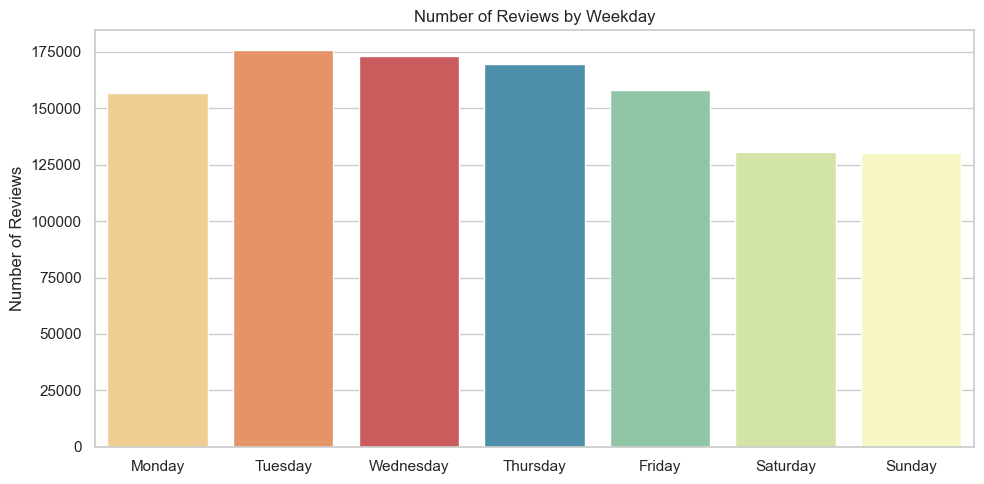

In [396]:
plt.figure(figsize=(10, 5))

sns.countplot(x='weekday',
              data=df_reviews,
              order=[
                  'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'
              ],
              palette='Spectral', hue='weekday')

plt.title('Number of Reviews by Weekday')
plt.xlabel('')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

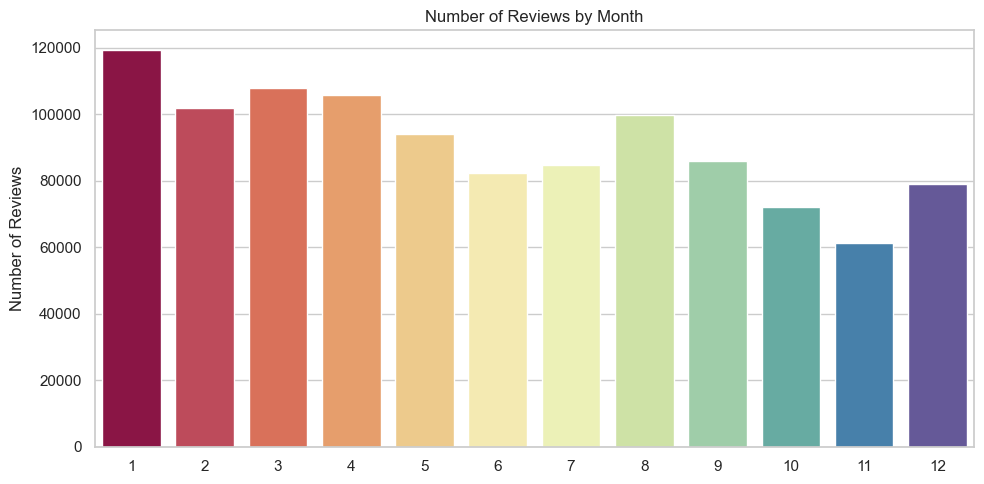

In [406]:
plt.figure(figsize=(10, 5))

sns.countplot(x='month', data=df_reviews, palette='Spectral', hue='month', legend=False)
plt.title('Number of Reviews by Month')
plt.xlabel('')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

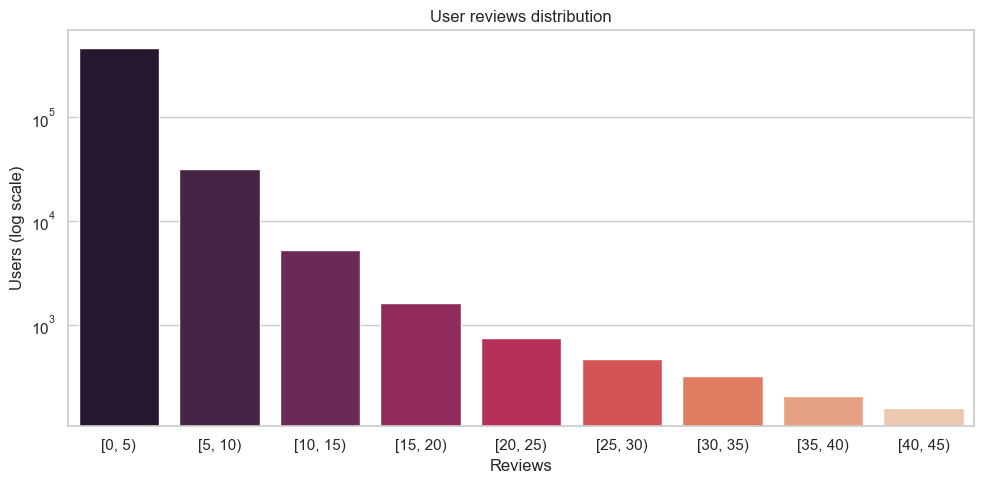

In [405]:
user_review_counts = df_reviews['author_id'].value_counts()
user_bins = pd.cut(user_review_counts, bins=range(0, 50, 5), right=False)

bin_counts = user_bins.value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=bin_counts.index,
            y=bin_counts.values,
            palette='rocket',
            hue=bin_counts.index, legend=False)

plt.title('User reviews distribution')
plt.xlabel('Reviews')
plt.ylabel('Users (log scale)')
plt.yscale('log')

plt.tight_layout()
plt.show()

## 8. Price analysis

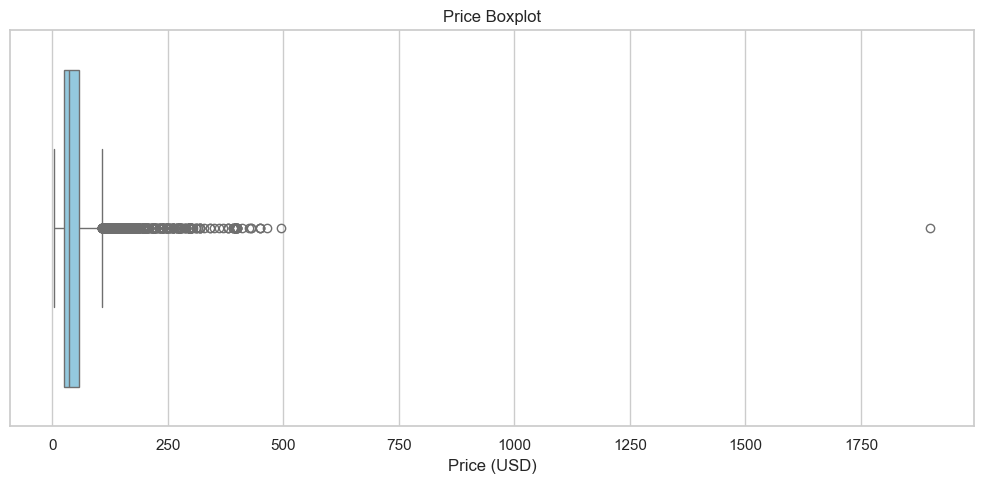

In [351]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_product_info['price_usd'], color='skyblue')
plt.title('Price Boxplot')
plt.xlabel('Price (USD)')

plt.tight_layout()
plt.show()

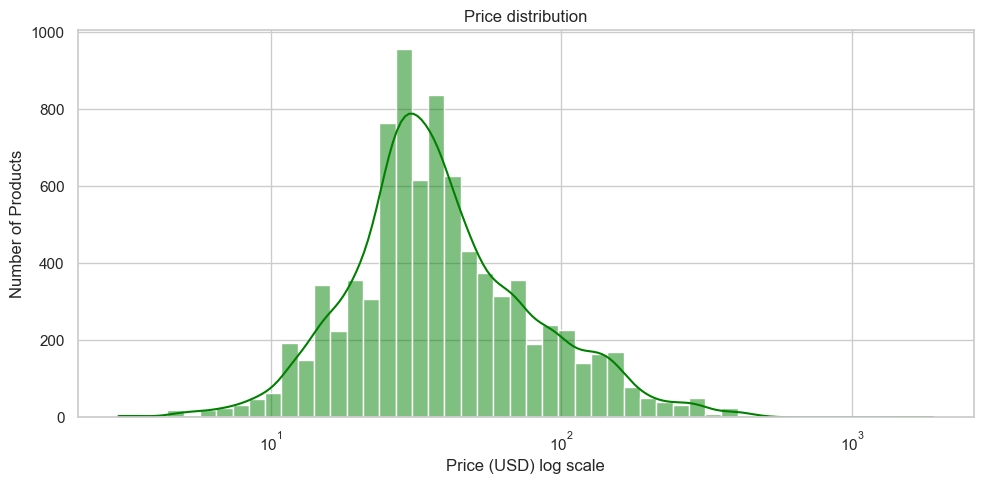

In [360]:
plt.figure(figsize=(10, 5))
sns.histplot(df_product_info['price_usd'],
             bins=50,
             log_scale=True,
             kde=True,
             color='green')

plt.title('Price distribution')
plt.xlabel('Price (USD) log scale')
plt.ylabel('Number of Products')

plt.tight_layout()
plt.show()


## 9. Correlation analysis

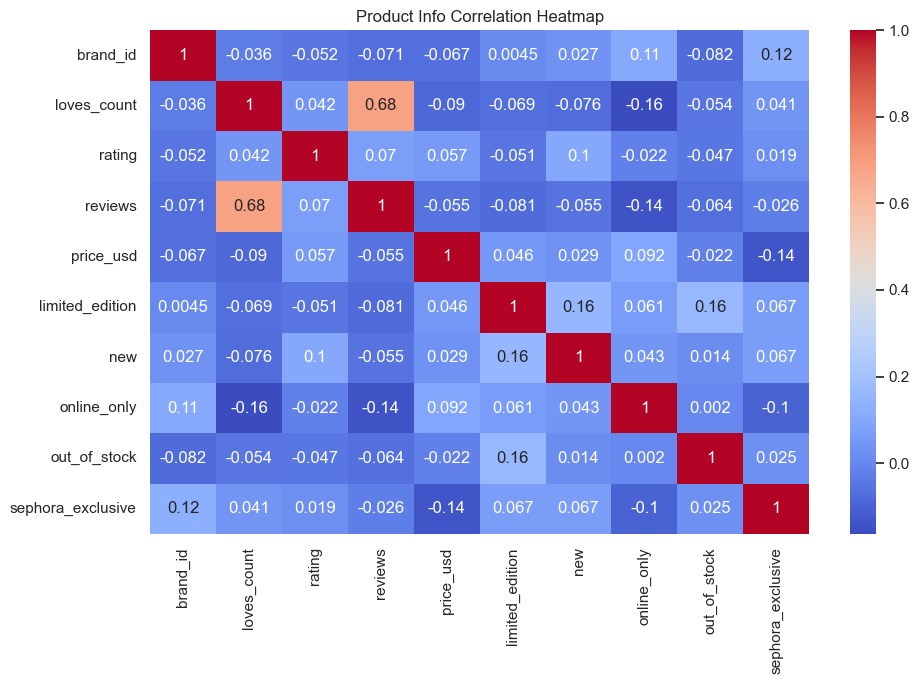

In [344]:
columns_to_keep = ['brand_id', 'loves_count', 'rating', 'reviews', 'price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']

plt.figure(figsize=(10, 7))
sns.heatmap(df_product_info[columns_to_keep].corr(numeric_only=True),
            annot=True, cmap='coolwarm')
plt.title('Product Info Correlation Heatmap')

plt.tight_layout()
plt.show()

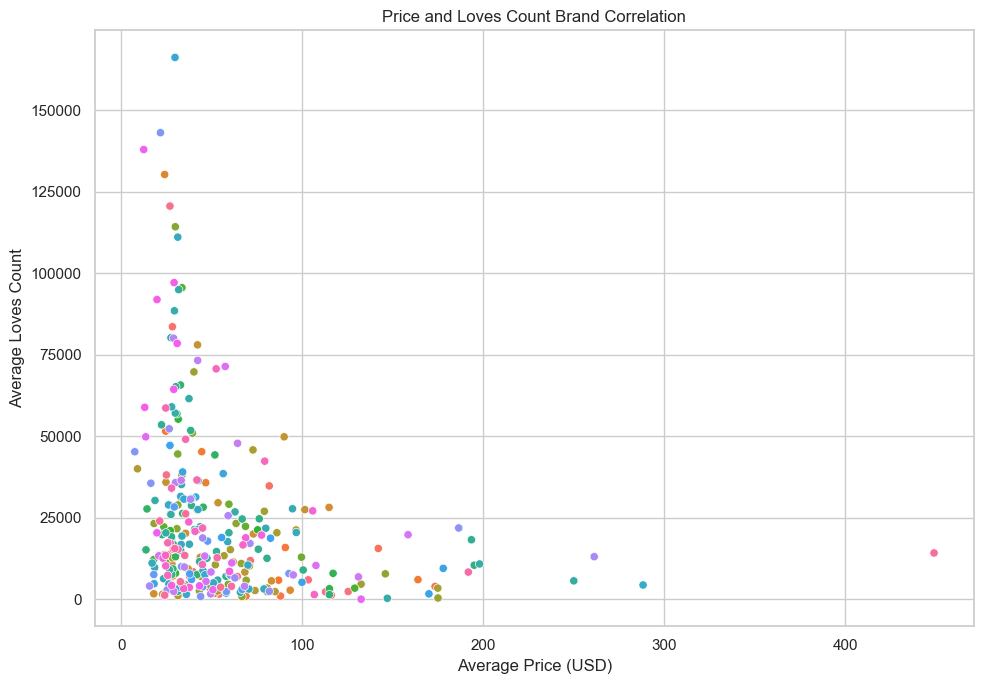

In [368]:
brand_stats = df_product_info.groupby('brand_name')[[
    'price_usd', 'loves_count'
]].mean().reset_index()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=brand_stats,
                x='price_usd',
                y='loves_count',
                hue='brand_name',
                legend=False,
                palette='husl')

plt.title('Price and Loves Count Brand Correlation')
plt.xlabel('Average Price (USD)')
plt.ylabel('Average Loves Count')
plt.grid(True)

plt.tight_layout()
plt.show()